In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [31]:
df_a=pd.read_csv('C:\\Users\\Raghav\\OneDrive\\Desktop\\project\\hull tactical kaggle\\data\\train.csv')
df_b=pd.read_csv('C:\\Users\\Raghav\\OneDrive\\Desktop\\project\\hull tactical kaggle\\data\\test.csv')

In [32]:
df_a.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [33]:
df_a.tail()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
9043,9043,0,0,0,1,1,0,0,1,0,...,0.186508,0.000661,1.010037,0.923942,-0.474519,0.080688,-0.439929,0.005458,0.000149,0.004998
9044,9044,0,0,0,1,1,0,0,1,0,...,0.128968,0.000661,0.492390,0.904101,-0.580852,0.070767,-0.496089,-0.004565,0.000147,-0.005024
9045,9045,0,0,0,1,1,0,0,0,1,...,0.062831,0.003307,0.332762,0.932540,-0.469138,0.057540,-0.411743,0.001852,0.000147,0.001395
9046,9046,0,0,0,1,1,0,0,0,1,...,0.011905,0.000661,0.476745,0.919974,-0.551739,0.052910,-0.468078,0.003463,0.000146,0.003006
9047,9047,0,0,0,1,0,0,0,0,1,...,0.003968,0.000661,0.482199,0.932540,-0.616707,0.050926,-0.487800,0.000117,0.000144,-0.000339


In [34]:
df_a.describe()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
count,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,...,8042.000000,8042.000000,7536.000000,8042.000000,7537.000000,8042.000000,4509.000000,9048.000000,9048.000000,9048.000000
mean,4523.500000,0.031609,0.031609,0.047856,0.575265,0.190760,-0.238174,0.045756,0.142905,0.143236,...,0.487920,0.505426,0.373707,0.290294,0.144482,0.302430,0.122810,0.000470,0.000107,0.000052
std,2612.076951,0.174967,0.174967,0.213473,0.494330,0.392922,0.425990,0.208967,0.349995,0.350333,...,0.306253,0.306571,1.149195,0.313430,1.322779,0.350292,1.270592,0.010535,0.000088,0.010552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000661,0.000661,-2.723527,0.000661,-2.027551,0.000661,-1.497420,-0.039754,-0.000004,-0.040582
25%,2261.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.205688,0.234954,-0.466911,0.000661,-0.794254,0.000661,-0.731204,-0.004321,0.000008,-0.004751
50%,4523.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.488757,0.516865,0.283280,0.185185,-0.103035,0.098049,-0.181941,0.000661,0.000099,0.000257
75%,6785.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.759094,0.770503,1.117657,0.525132,0.788774,0.587302,0.670649,0.005891,0.000193,0.005469
max,9047.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,6.809912,1.000000,12.678264,1.000000,12.997540,0.040661,0.000317,0.040551


In [35]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        9048 non-null   int64  
 1   D1                             9048 non-null   int64  
 2   D2                             9048 non-null   int64  
 3   D3                             9048 non-null   int64  
 4   D4                             9048 non-null   int64  
 5   D5                             9048 non-null   int64  
 6   D6                             9048 non-null   int64  
 7   D7                             9048 non-null   int64  
 8   D8                             9048 non-null   int64  
 9   D9                             9048 non-null   int64  
 10  E1                             7264 non-null   float64
 11  E10                            8042 non-null   float64
 12  E11                            8042 non-null   f

# Exploratory Data Analysis (EDA)

## Overview
This section provides a comprehensive analysis of the Hull Tactical dataset to understand:
- Data structure and quality
- Feature distributions and relationships
- Missing values and outliers
- Target variable characteristics

## 1. Dataset Overview

In [36]:
# Dataset shapes and basic info
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Training set shape: {df_a.shape}")
print(f"Test set shape: {df_b.shape}")
print(f"\nTraining set columns: {list(df_a.columns)}")
print(f"Test set columns: {list(df_b.columns)}")
print(f"\nColumns in train but not in test: {set(df_a.columns) - set(df_b.columns)}")
print(f"Columns in test but not in train: {set(df_b.columns) - set(df_a.columns)}")

DATASET OVERVIEW
Training set shape: (9048, 98)
Test set shape: (10, 99)

Training set columns: ['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
Test set columns: ['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 

## 2. Missing Values Analysis

In [37]:
# Missing values analysis for training set
print("="*50)
print("MISSING VALUES - TRAINING SET")
print("="*50)
missing_train = df_a.isnull().sum()
missing_train_pct = (df_a.isnull().sum() / len(df_a)) * 100

missing_df_train = pd.DataFrame({
    'Column': missing_train.index,
    'Missing Count': missing_train.values,
    'Missing Percentage': missing_train_pct.values
})

missing_df_train = missing_df_train[missing_df_train['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df_train) > 0:
    print(missing_df_train.to_string(index=False))
else:
    print("No missing values found in training set!")

print("\n" + "="*50)
print("MISSING VALUES - TEST SET")
print("="*50)
missing_test = df_b.isnull().sum()
missing_test_pct = (df_b.isnull().sum() / len(df_b)) * 100

missing_df_test = pd.DataFrame({
    'Column': missing_test.index,
    'Missing Count': missing_test.values,
    'Missing Percentage': missing_test_pct.values
})

missing_df_test = missing_df_test[missing_df_test['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df_test) > 0:
    print(missing_df_test.to_string(index=False))
else:
    print("No missing values found in test set!")

MISSING VALUES - TRAINING SET
Column  Missing Count  Missing Percentage
    E7           6969           77.022546
   V10           6049           66.854553
    S3           5733           63.362069
    M1           5547           61.306366
   M13           5540           61.229001
   M14           5540           61.229001
    M6           5043           55.736074
    V9           4539           50.165782
   S12           3537           39.091512
    M5           3283           36.284262
    M2           3217           35.554819
    S8           3009           33.255968
    M3           2018           22.303271
    E1           1784           19.717065
    P6           1638           18.103448
    P7           1616           17.860301
   E20           1616           17.860301
    P5           1574           17.396110
    V5           1512           16.710875
    V7           1511           16.699823
   V13           1511           16.699823
    S5           1511           16.699823
    

## 3. Data Types and Statistics

In [38]:
# Data types analysis
print("="*50)
print("DATA TYPES - TRAINING SET")
print("="*50)
dtypes_train = df_a.dtypes.value_counts()
print("Data type distribution:")
for dtype, count in dtypes_train.items():
    print(f"  {dtype}: {count} columns")

print(f"\nNumeric columns: {len(df_a.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical columns: {len(df_a.select_dtypes(include=['object']).columns)}")

# Identify potential target column (usually has different pattern or is mentioned in kaggle)
numeric_cols = df_a.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_a.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# Check for unique value counts to identify potential ID columns or targets
print("\n" + "="*50)
print("UNIQUE VALUE COUNTS (First 10 columns)")
print("="*50)
for col in df_a.columns[:10]:
    unique_count = df_a[col].nunique()
    total_count = len(df_a)
    print(f"{col}: {unique_count} unique values ({unique_count/total_count:.2%} unique)")

DATA TYPES - TRAINING SET
Data type distribution:
  float64: 88 columns
  int64: 10 columns

Numeric columns: 98
Categorical columns: 0

Numeric columns: ['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
Categorical columns: []

UNIQUE VALUE COUNTS (First 10 columns)
date_id: 9048 unique values (100.00% unique)
D1: 2 unique values (0.02% unique)
D2: 2 unique values (0.02

## 4. Feature Distributions and Visualizations

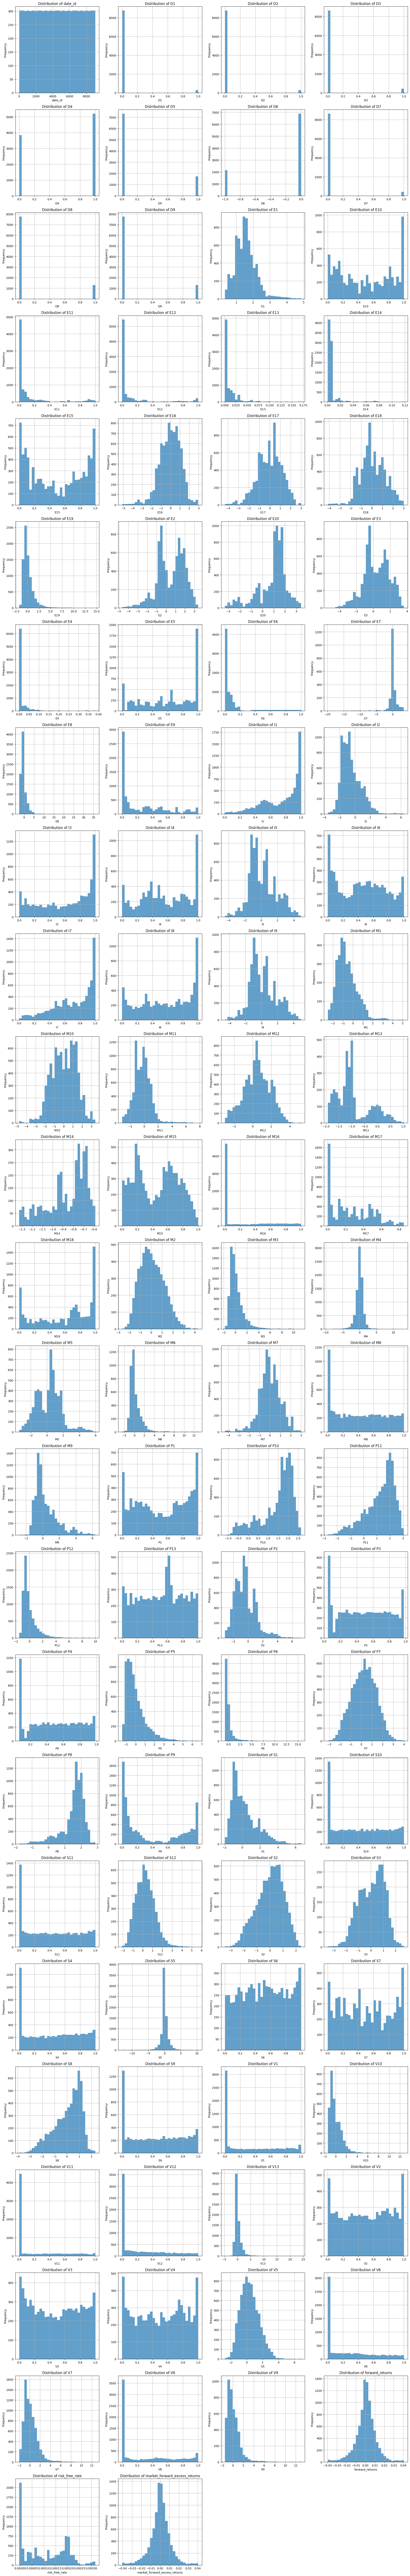

In [39]:
# Get numeric columns for visualization
numeric_columns = df_a.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_columns) > 0:
    # Create subplots for distributions
    fig, axes = plt.subplots(nrows=(len(numeric_columns)+3)//4, ncols=4, figsize=(20, 5*((len(numeric_columns)+3)//4)))
    axes = axes.flatten() if len(numeric_columns) > 1 else [axes]
    
    for i, column in enumerate(numeric_columns):
        if i < len(axes):
            df_a[column].hist(bins=30, ax=axes[i], alpha=0.7)
            axes[i].set_title(f'Distribution of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
    
    # Hide empty subplots
    for i in range(len(numeric_columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for distribution plots.")

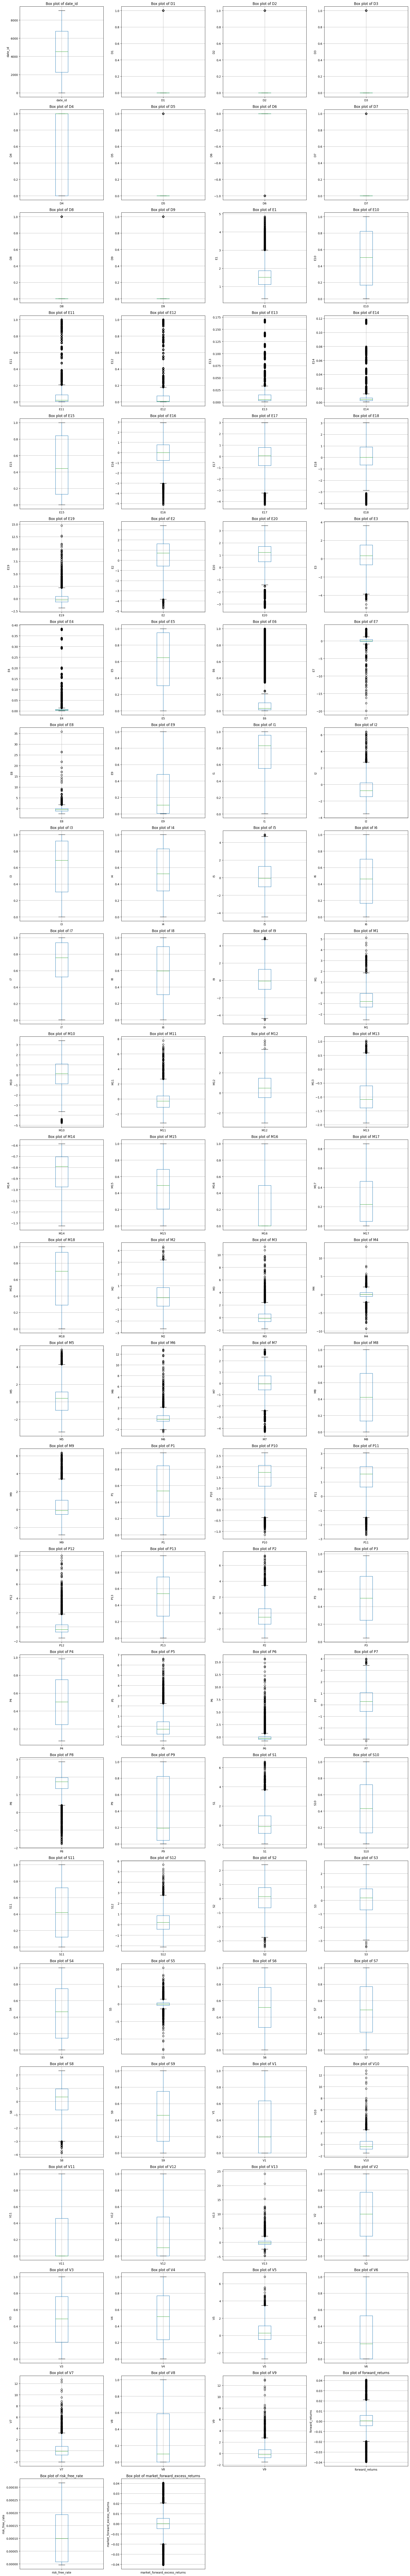

OUTLIER DETECTION (IQR Method)
date_id: 0 outliers (0.00%)
D1: 286 outliers (3.16%)
D2: 286 outliers (3.16%)
D3: 433 outliers (4.79%)
D4: 0 outliers (0.00%)
D5: 1726 outliers (19.08%)
D6: 2155 outliers (23.82%)
D7: 414 outliers (4.58%)
D8: 1293 outliers (14.29%)
D9: 1296 outliers (14.32%)
E1: 215 outliers (2.38%)
E10: 0 outliers (0.00%)
E11: 1244 outliers (13.75%)
E12: 1316 outliers (14.54%)
E13: 604 outliers (6.68%)
E14: 751 outliers (8.30%)
E15: 0 outliers (0.00%)
E16: 144 outliers (1.59%)
E17: 82 outliers (0.91%)
E18: 61 outliers (0.67%)
E19: 421 outliers (4.65%)
E2: 37 outliers (0.41%)
E20: 513 outliers (5.67%)
E3: 35 outliers (0.39%)
E4: 1621 outliers (17.92%)
E5: 0 outliers (0.00%)
E6: 1011 outliers (11.17%)
E7: 360 outliers (3.98%)
E8: 561 outliers (6.20%)
E9: 0 outliers (0.00%)
I1: 0 outliers (0.00%)
I2: 109 outliers (1.20%)
I3: 0 outliers (0.00%)
I4: 0 outliers (0.00%)
I5: 5 outliers (0.06%)
I6: 0 outliers (0.00%)
I7: 0 outliers (0.00%)
I8: 0 outliers (0.00%)
I9: 7 outliers (0

In [40]:
# Box plots for outlier detection
if len(numeric_columns) > 0:
    fig, axes = plt.subplots(nrows=(len(numeric_columns)+3)//4, ncols=4, figsize=(20, 5*((len(numeric_columns)+3)//4)))
    axes = axes.flatten() if len(numeric_columns) > 1 else [axes]
    
    for i, column in enumerate(numeric_columns):
        if i < len(axes):
            df_a.boxplot(column=column, ax=axes[i])
            axes[i].set_title(f'Box plot of {column}')
            axes[i].set_ylabel(column)
    
    # Hide empty subplots
    for i in range(len(numeric_columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

    # Statistical summary for outliers
    print("="*50)
    print("OUTLIER DETECTION (IQR Method)")
    print("="*50)
    for column in numeric_columns:
        Q1 = df_a[column].quantile(0.25)
        Q3 = df_a[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df_a[(df_a[column] < lower_bound) | (df_a[column] > upper_bound)]
        print(f"{column}: {len(outliers)} outliers ({len(outliers)/len(df_a):.2%})")
else:
    print("No numeric columns found for box plots.")

## 5. Correlation Analysis

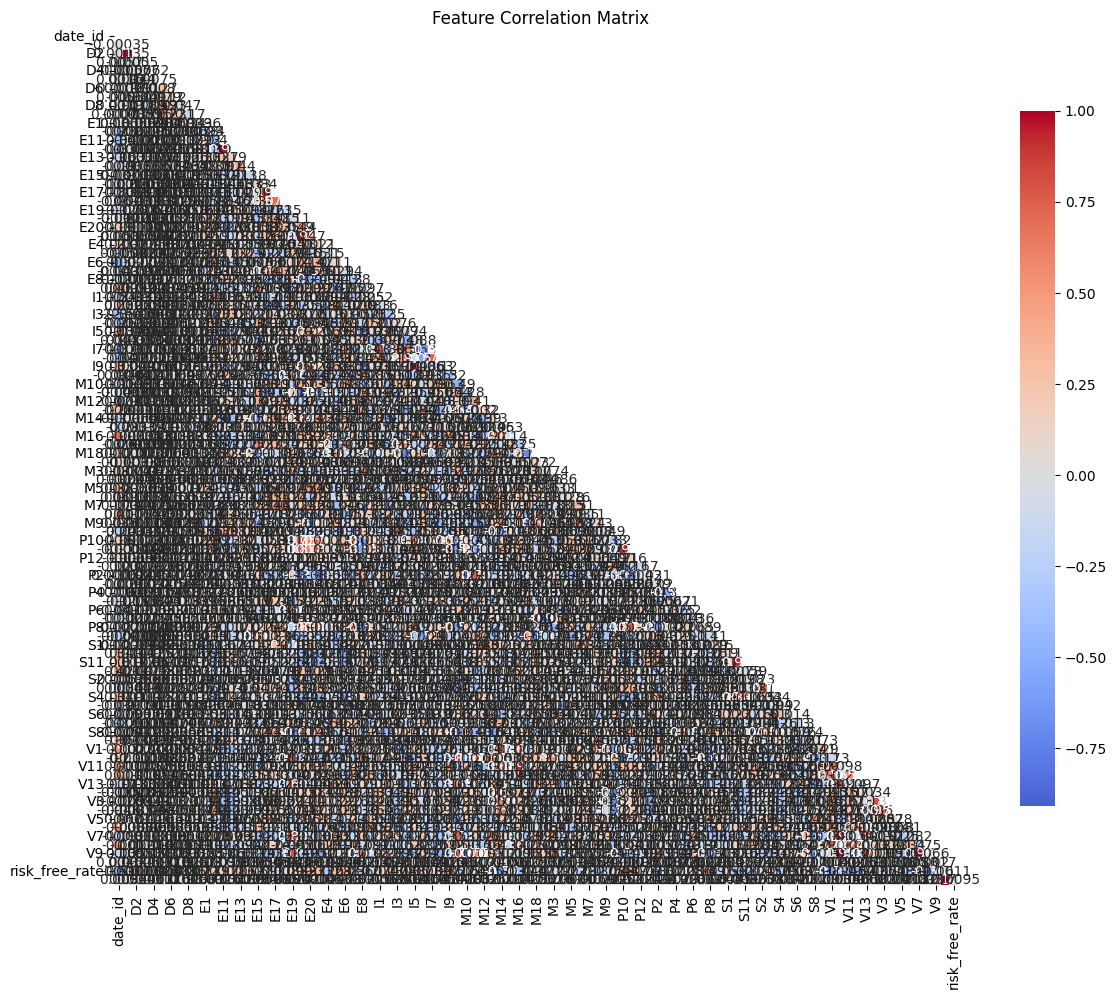

HIGHLY CORRELATED FEATURES (>0.8 or <-0.8)
D1 <-> D2: 1.000
E11 <-> E12: 0.974
E16 <-> E17: 0.918
E19 <-> V7: 0.830
E2 <-> E3: 0.961
E2 <-> P11: 0.867
E2 <-> P2: -0.876
E3 <-> P11: 0.871
E3 <-> P2: -0.896
I4 <-> I8: 0.830
I5 <-> I9: 1.000
M1 <-> V10: 0.857
M16 <-> V11: 0.932
M2 <-> P7: -0.909
P10 <-> P11: 0.937
P10 <-> P8: 0.807
S10 <-> S11: 0.944
S10 <-> S4: 0.840
S11 <-> S4: 0.886
V10 <-> V7: 0.934
V10 <-> V9: 0.985
V13 <-> V7: 0.847
V2 <-> V3: 0.803
V2 <-> V4: 0.952
V7 <-> V9: 0.978
forward_returns <-> market_forward_excess_returns: 1.000


In [41]:
# Correlation matrix for numeric features
if len(numeric_columns) > 1:
    correlation_matrix = df_a[numeric_columns].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                mask=mask,
                cbar_kws={"shrink": .8})
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated features
    print("="*50)
    print("HIGHLY CORRELATED FEATURES (>0.8 or <-0.8)")
    print("="*50)
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.8:
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      corr_val))
    
    if high_corr_pairs:
        for col1, col2, corr in high_corr_pairs:
            print(f"{col1} <-> {col2}: {corr:.3f}")
    else:
        print("No highly correlated features found.")
        
else:
    print("Not enough numeric columns for correlation analysis.")

## 6. Categorical Features Analysis

In [42]:
# Categorical features analysis
categorical_columns = df_a.select_dtypes(include=['object']).columns.tolist()

if len(categorical_columns) > 0:
    print("="*50)
    print("CATEGORICAL FEATURES ANALYSIS")
    print("="*50)
    
    for column in categorical_columns:
        print(f"\n{column.upper()}:")
        print(f"  Unique values: {df_a[column].nunique()}")
        print(f"  Value counts:")
        value_counts = df_a[column].value_counts()
        for value, count in value_counts.head(10).items():
            percentage = (count / len(df_a)) * 100
            print(f"    {value}: {count} ({percentage:.1f}%)")
        if len(value_counts) > 10:
            print(f"    ... and {len(value_counts) - 10} more values")
    
    # Visualize categorical features
    if len(categorical_columns) <= 6:  # Only plot if not too many
        fig, axes = plt.subplots(nrows=(len(categorical_columns)+1)//2, ncols=2, 
                                figsize=(15, 4*((len(categorical_columns)+1)//2)))
        if len(categorical_columns) == 1:
            axes = [axes]
        else:
            axes = axes.flatten()
        
        for i, column in enumerate(categorical_columns):
            if i < len(axes):
                top_values = df_a[column].value_counts().head(10)
                top_values.plot(kind='bar', ax=axes[i])
                axes[i].set_title(f'Top 10 values in {column}')
                axes[i].set_xlabel(column)
                axes[i].set_ylabel('Count')
                axes[i].tick_params(axis='x', rotation=45)
        
        # Hide empty subplot if odd number of categorical columns
        if len(categorical_columns) % 2 == 1 and len(categorical_columns) > 1:
            axes[-1].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nToo many categorical columns ({len(categorical_columns)}) to visualize individually.")
        
else:
    print("No categorical columns found in the dataset.")

No categorical columns found in the dataset.


## 7. Key Insights and Next Steps

In [43]:
# Summary of key findings
print("="*60)
print("EDA SUMMARY AND KEY FINDINGS")
print("="*60)

print(f"📊 Dataset Size:")
print(f"   • Training set: {df_a.shape[0]} rows, {df_a.shape[1]} columns")
print(f"   • Test set: {df_b.shape[0]} rows, {df_b.shape[1]} columns")

print(f"\n🔢 Feature Types:")
numeric_cols = df_a.select_dtypes(include=[np.number]).columns
categorical_cols = df_a.select_dtypes(include=['object']).columns
print(f"   • Numeric features: {len(numeric_cols)}")
print(f"   • Categorical features: {len(categorical_cols)}")

print(f"\n❓ Missing Values:")
total_missing_train = df_a.isnull().sum().sum()
total_missing_test = df_b.isnull().sum().sum()
print(f"   • Training set: {total_missing_train} missing values")
print(f"   • Test set: {total_missing_test} missing values")

if len(numeric_cols) > 0:
    print(f"\n📈 Numeric Features Range:")
    for col in numeric_cols[:5]:  # Show first 5 numeric columns
        min_val = df_a[col].min()
        max_val = df_a[col].max()
        print(f"   • {col}: {min_val:.2f} to {max_val:.2f}")

print(f"\n🎯 Recommended Next Steps:")
print("   1. Identify the target variable from competition description")
print("   2. Handle missing values if any")
print("   3. Feature engineering and scaling")
print("   4. Model selection and training")
print("   5. Cross-validation and evaluation")
print("   6. Generate predictions for submission")

# Check for potential issues
print(f"\n⚠️  Potential Issues to Address:")
issues = []

if total_missing_train > 0 or total_missing_test > 0:
    issues.append("Missing values need handling")

# Check for potential ID columns (high unique count)
for col in df_a.columns:
    if df_a[col].nunique() == len(df_a):
        issues.append(f"'{col}' might be an ID column (100% unique)")

# Check for constant columns
for col in df_a.columns:
    if df_a[col].nunique() == 1:
        issues.append(f"'{col}' is constant (only 1 unique value)")

if issues:
    for issue in issues:
        print(f"   • {issue}")
else:
    print("   • No major issues detected!")

EDA SUMMARY AND KEY FINDINGS
📊 Dataset Size:
   • Training set: 9048 rows, 98 columns
   • Test set: 10 rows, 99 columns

🔢 Feature Types:
   • Numeric features: 98
   • Categorical features: 0

❓ Missing Values:
   • Training set: 137675 missing values
   • Test set: 0 missing values

📈 Numeric Features Range:
   • date_id: 0.00 to 9047.00
   • D1: 0.00 to 1.00
   • D2: 0.00 to 1.00
   • D3: 0.00 to 1.00
   • D4: 0.00 to 1.00

🎯 Recommended Next Steps:
   1. Identify the target variable from competition description
   2. Handle missing values if any
   3. Feature engineering and scaling
   4. Model selection and training
   5. Cross-validation and evaluation
   6. Generate predictions for submission

⚠️  Potential Issues to Address:
   • Missing values need handling
   • 'date_id' might be an ID column (100% unique)
